In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
df = pd.read_excel("Linear Regression.xlsx")
df

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


# Hence there are no null values

# Splitting independent and dependent variables

In [4]:
X =  df.iloc[:, 1:]
y = df.price

# Checking distribution of each independent variable 

In [5]:
def distribution_check(column):
    description = {
        "Mean": [df[column].mean()],
        "Median": [df[column].median()],
        "Mode": [df[column].mode()[0]],
        "Skew": [df[column].skew()],
        "Kurt": [df[column].kurt()]
    }
    df_new = pd.DataFrame(description)
    df_new.rename(index={0:column}, inplace = True)
    plt.hist(df[column])
    plt.show()
    return df_new

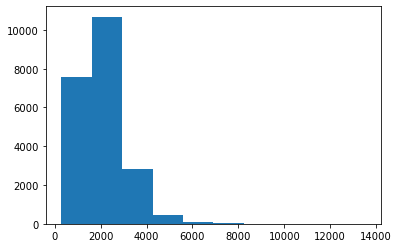

                    Mean  Median  Mode      Skew      Kurt
sqft_living  2079.899736  1910.0  1300  1.471555  5.243093 




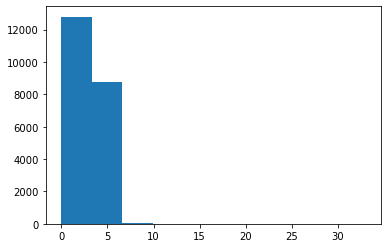

              Mean  Median  Mode    Skew       Kurt
bedrooms  3.370842     3.0     3  1.9743  49.063653 




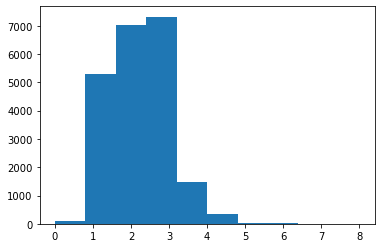

               Mean  Median  Mode      Skew      Kurt
bathrooms  2.114757    2.25   2.5  0.511108  1.279902 




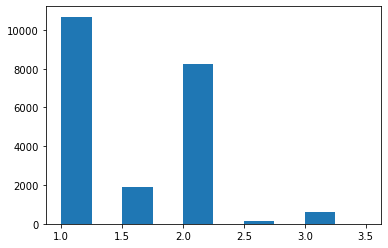

            Mean  Median  Mode      Skew      Kurt
floors  1.494309     1.5   1.0  0.616177 -0.484723 




In [6]:
for var in X.columns:
    print(distribution_check(var), "\n\n")
    

# Hence all the features have different distribution (Heteroscedasticity)

# Checking for any less density extreme outliers

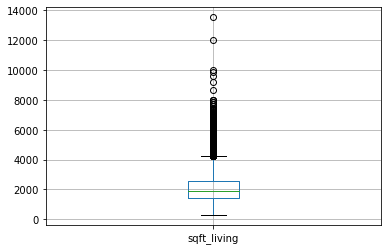

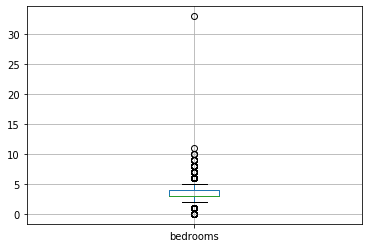

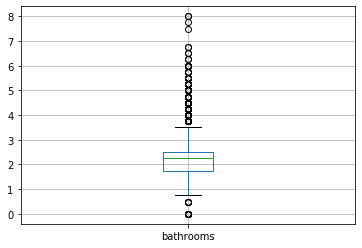

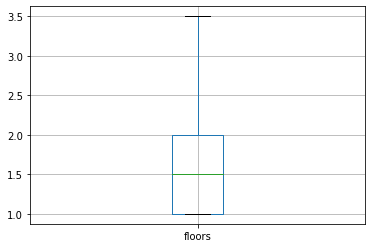

In [7]:
features = X.columns
for column in features:
    df.boxplot([column])
    plt.show()

# As we can see, bedroom variable has quite a high outlier that, hence we can convert it into its median value

In [8]:
X[X.bedrooms > 30]

,sqft_living,bedrooms,bathrooms,floors
15870,1620,33,1.75,1.0


In [9]:
med = X[(X.sqft_living == 1620)&(X.floors == 1)].bedrooms.median()
X.loc[X.bedrooms > 30, "bedrooms"] = med

# Checking collinearity between all independent variables

In [10]:
X.corr()

,sqft_living,bedrooms,bathrooms,floors
sqft_living,1.000000,0.591471,0.754665,0.353949
bedrooms,0.591471,1.000000,0.529163,0.181098
bathrooms,0.754665,0.529163,1.000000,0.500653
floors,0.353949,0.181098,0.500653,1.000000


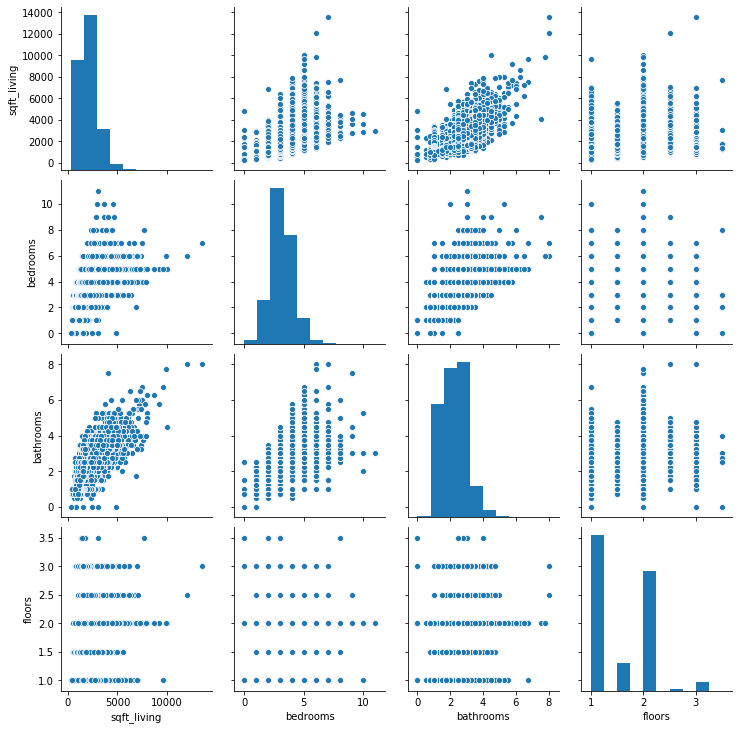

In [11]:
sns.pairplot(X)

# Hence the independent variables are multicollinear, which is not great for Linear regression model

# Checking collinearity between independent and dependent variable

In [12]:
for feature in X.columns:
    print(f"{feature} vs Price: {X[feature].corr(y)}")

sqft_living vs Price: 0.7020350524336836
bedrooms vs Price: 0.31543799160457914
bathrooms vs Price: 0.5251375045796027
floors vs Price: 0.25679388406334075


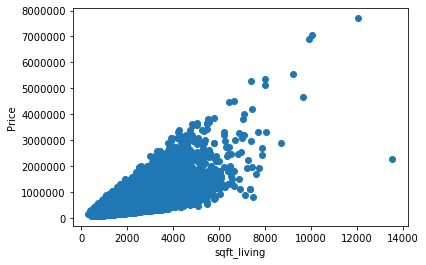

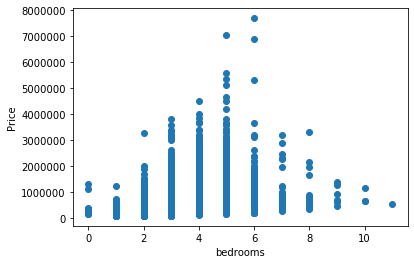

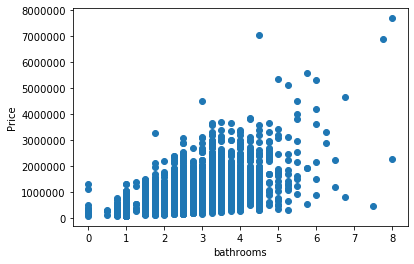

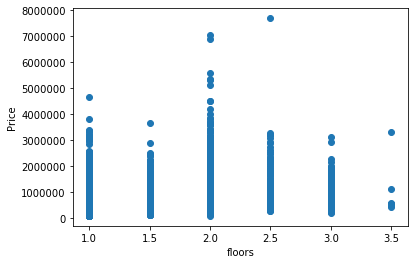

In [13]:
for feature in X.columns:
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

# From the above data we can say that the following variables are more likely to  affect the dependent variable

<ul>
    <li>sqft_living</li>
    <li>bathrooms</li>
</ul>

In [14]:
X_model = X.loc[:, ["sqft_living", "bathrooms"]]
X_model

,sqft_living,bathrooms
0,1180,1.00
1,2570,2.25
2,770,1.00
3,1960,3.00
4,1680,2.00
...,...,...
21608,1530,2.50
21609,2310,2.50
21610,1020,0.75
21611,1600,2.50


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Splitting data into train and test data

In [35]:
X_train, X_test, y_train, y_test =  train_test_split(X_model, y, test_size = 0.1)

# Making model

In [36]:
model = LinearRegression(normalize=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = model.score(X_test, y_test)
print("Accuracy:", acc*100)

Accuracy: 53.47475198020584


In [37]:
c = model.intercept_
m = model.coef_
print("Intercept:", c)
print("Coefficients:", m)
print(f"Equation of line: y= {c}", end=" ")
for i in range(len(m)):
    print(f"+ {X_test.columns[i]}({round(m[i], 3)})", end=" ")

Intercept: -35164.43861399172
Coefficients: [  281.41261761 -5111.22147764]
Equation of line: y= -35164.43861399172 + sqft_living(281.413) + bathrooms(-5111.221) 

In [38]:
print("Hence at no sqft area and no bathrooms, the house price will be",round(c, 3))
print("Also:")
for i in range(len(m)):
    print(f"-->Increase in one {X_test.columns[i]} leads to {round(m[i], 3)} units of price")

Hence at no sqft area and no bathrooms, the house price will be -35164.439
Also:
-->Increase in one sqft_living leads to 281.413 units of price
-->Increase in one bathrooms leads to -5111.221 units of price


# Predicting VS Actual values

In [39]:
for i in range(len(y_pred)):
    print("Prediction:", round(y_pred[i], 3), "Actual:", y_test.iloc[i])

Prediction: 232694.579 Actual: 165000
Prediction: 381843.266 Actual: 736000
Prediction: 190999.717 Actual: 308500
Prediction: 450157.841 Actual: 455000
Prediction: 259816.551 Actual: 185000
Prediction: 643815.516 Actual: 662700
Prediction: 170783.803 Actual: 425000
Prediction: 561445.083 Actual: 366000
Prediction: 297936.512 Actual: 935000
Prediction: 196110.939 Actual: 360000
Prediction: 543024.005 Actual: 317000
Prediction: 311748.627 Actual: 401000
Prediction: 660958.789 Actual: 562000
Prediction: 610304.517 Actual: 420000
Prediction: 248560.046 Actual: 382500
Prediction: 854114.205 Actual: 399950
Prediction: 659680.983 Actual: 541100
Prediction: 384155.133 Actual: 650000
Prediction: 404356.276 Actual: 729000
Prediction: 1048805.942 Actual: 1165000
Prediction: 1064915.153 Actual: 1310000
Prediction: 338612.084 Actual: 279900
Prediction: 197388.744 Actual: 224000
Prediction: 575257.198 Actual: 305000
Prediction: 387988.55 Actual: 229000
Prediction: 965142.931 Actual: 682000
Predictio

Prediction: 456805.383 Actual: 325000
Prediction: 475484.976 Actual: 291000
Prediction: 344240.336 Actual: 350000
Prediction: 514624.227 Actual: 540000
Prediction: 513087.907 Actual: 329000
Prediction: 661217.304 Actual: 875000
Prediction: 452196.421 Actual: 234000
Prediction: 215809.822 Actual: 465000
Prediction: 462433.635 Actual: 381000
Prediction: 769690.42 Actual: 1200000
Prediction: 340148.405 Actual: 232500
Prediction: 938796.506 Actual: 1110000
Prediction: 321727.327 Actual: 270000
Prediction: 607748.907 Actual: 325000
Prediction: 345776.657 Actual: 288790
Prediction: 239098.378 Actual: 300000
Prediction: 634095.332 Actual: 432000
Prediction: 545579.615 Actual: 283000
Prediction: 494408.313 Actual: 315000
Prediction: 360105.803 Actual: 279000
Prediction: 423294.384 Actual: 282500
Prediction: 642796.226 Actual: 510000
Prediction: 545838.131 Actual: 289000
Prediction: 424572.19 Actual: 448000
Prediction: 428664.121 Actual: 637500
Prediction: 634353.848 Actual: 282000
Prediction: 

Prediction: 1011705.271 Actual: 940000
Prediction: 1283656.22 Actual: 770000
Prediction: 900418.029 Actual: 1245000
Prediction: 173597.929 Actual: 122000
Prediction: 342962.531 Actual: 462000
Prediction: 717499.828 Actual: 580000
Prediction: 390544.16 Actual: 480000
Prediction: 373659.403 Actual: 305000
Prediction: 808829.671 Actual: 760000
Prediction: 559908.762 Actual: 555000
Prediction: 510273.78 Actual: 606000
Prediction: 793481.234 Actual: 760000
Prediction: 897862.418 Actual: 785000
Prediction: 681935.477 Actual: 383000
Prediction: 628725.595 Actual: 620000
Prediction: 538415.042 Actual: 690000
Prediction: 635890.168 Actual: 770000
Prediction: 393358.286 Actual: 245000
Prediction: 456805.383 Actual: 354950
Prediction: 274906.472 Actual: 205000
Prediction: 754083.468 Actual: 550000
Prediction: 297419.481 Actual: 375000
Prediction: 434292.374 Actual: 600000
Prediction: 348590.783 Actual: 240000
Prediction: 345259.626 Actual: 229000
Prediction: 320449.521 Actual: 344000
Prediction: 